In [109]:
# Import lib
# ===========================================================
import csv
from datascience import *
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import random
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import collections
import math
import sys
# from tqdm import tqdm
from time import sleep
import seaborn as sns
import os
# print(os.listdir("../input"))

# Set random seed to make results reproducable
np.random.seed(42)
plt.style.use('seaborn')

In [2]:
# Initialize useful data
# ===========================================================
# with open('clinvar_conflicting_clean.csv', 'r') as f:
#     reader = csv.reader(f)
#     temp_rows = list(reader)
df = pd.read_csv('clinvar_conflicting_clean.csv', low_memory=False)
columns_to_change = ['ORIGIN', 'EXON', 'INTRON', 'STRAND', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62']
df[['CLNVI', 'MC', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 
 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 
 'BAM_EDIT', 'SIFT', 'PolyPhen']] = df[['CLNVI', 'MC', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 
 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 
 'BAM_EDIT', 'SIFT', 'PolyPhen']].fillna(value="null")
df = df.sample(n = df.shape[0])
all_rows = df.values.tolist()
row_num = len(all_rows)

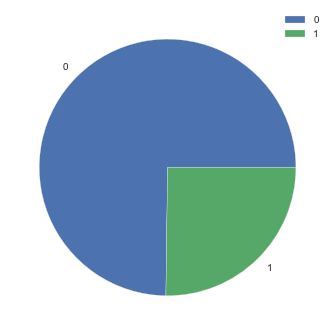

In [118]:
# before balancing
# ============================================================
pos = Table().with_columns('X', [random.random() for _ in range(df.shape[0])], 'Y', [random.random() for _ in range(df.shape[0])], 'CLASS', df['CLASS'].values.tolist())
color_idx = df['CLASS'].values.tolist()
sel = [[0.423, 0.69, 0.918], [1, 0.435, 0.38]]
colors = [i for i in color_idx]
counts = pos.group('CLASS')
fig = plt.figure()
_ = plt.pie(counts.column(1), labels=[0,1])
_ = plt.legend([0,1])
fig.savefig('Imbalance Data.png', bbox_inches='tight')

In [111]:
# balancing data
# ============================================================
g = df.groupby('CLASS')
df_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
# Extract smaller sample to avoid memory error later, when training starts
df_balanced = df_balanced.sample(1000)

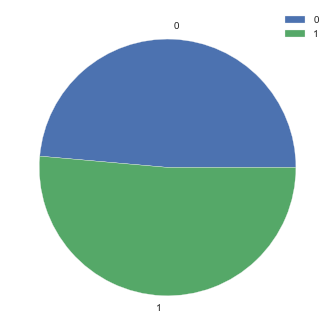

In [119]:
# after balancing
# ============================================================
pos = Table().with_columns('CLASS', df_balanced['CLASS'].values.tolist())
counts = pos.group('CLASS')
fig = plt.figure()
_ = plt.pie(counts.column(1), labels=[0,1])
_ = plt.legend([0,1])
fig.savefig('Balanced Data.png', bbox_inches='tight')